## K-Means Clustering

## Theory

K-Means Clustering is an unsupervised learning algorithm that clusters unlabeled data by initially randomly assigning centroids, finding the closest centroid to each datapoint and updating the centroid until the clustering stays constant.

## Algorithm

We want to classify unlabeled data

Inputs: $X = x_1,...,x_n$ unlabeled feature vectors

Goal: Group the vectors according to similar features

Initialize: $C = C^1,...,C^k$ randomly chosen centroids

    Example: k = 2

1. Calculate the Euclidean distance from each feature vector to each centroid.

1. Assign to each feature vector the centroid that is closest.(If $x^{(i)}$ was assigned centroid$^{(j)}$, then the current label of $x^{(i)}$ is $j$) Let $S_i$ be the set of all feature vectors assigned to centroid$^{(j)}$.

1. Update the centroids in C by $C^(i)_j = \frac{1}{|S_i|} \sum_{x \in S_i} x_j$ <= this is the mean along the $j$-dimension for cluster $i$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Implementation

The KMeans class takes K, maximum number of iterations, and plot steps, a `bool` variable that plots the intermediate steps of the algorithm if set to `True`.

KMeans has 7 Methods.

* KMeans.predict() is where the K-means Clustering algorithm is implemented

* KMeans.get_cluster_labels(), KMeans.get_centroids(), KMeans.closest_centroid() are internal methods that are used by KMeans.predict() to optimize the Centroids.

* KMeans.is_converged() determines if the algorithm is complete

* KMeans.plot() plots the data and centroids with all the data in one cluster sharing a color.

In [2]:
def distance(x1,x2):
     return np.sqrt(np.sum((x1-x2)**2))
class KMeans:

    def __init__(self,K = 5,max_iters = 100, plot_steps = False):
        self.K = K
        self.max_iters = max_iters
        self.plot_steps = plot_steps

        # List of sample indices for each cluster
        self.clusters = [[] for _ in range(self.K)]
        # mean feature vectors for each cluster 
        self.centroids = []

    def predict(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        #Initialize Centroids
        random_sample_idx = np.random.choice(self.n_samples, self.K, replace = False)
        self.centroids = [self.X[idx] for idx in random_sample_idx]


        #Optimization
        for _ in range(self.max_iters):
            # Update Clusters
            self.clusters = self.create_clusters(self.centroids)

            if self.plot_steps:
                self.plot()

            # Update Centroids
            centroids_old = self.centroids
            self.centroids = self.get_centroids(self.clusters)

            
            # Check if converged
            if self.is_converged(centroids_old, self.centroids):
                break

            if self.plot_steps:
                self.plot()

        # return cluster labels
        return self.get_cluster_labels(self.clusters)

    def get_cluster_labels(self, clusters):
        labels = np.empty(self.n_samples)

        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels

    def create_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self.closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters
    
    def get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis = 0)
            centroids[cluster_idx] = cluster_mean
        return centroids

    def closest_centroid(self,sample,centroids):
        distances = [distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def is_converged(self, centroids_old, centroids):
        distances = [distance(centroids_old[i], centroids[i]) for i in range(self.K)]
        return sum(distances) == 0

        
    def plot(self):
        fig, ax = plt.subplots(figsize=(12,8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
        
        for point in self.centroids:
            ax.scatter(*point, marker = "x", color = "black", linewidth = 2)

        plt.show()



# Demonstration

(500, 2)
4


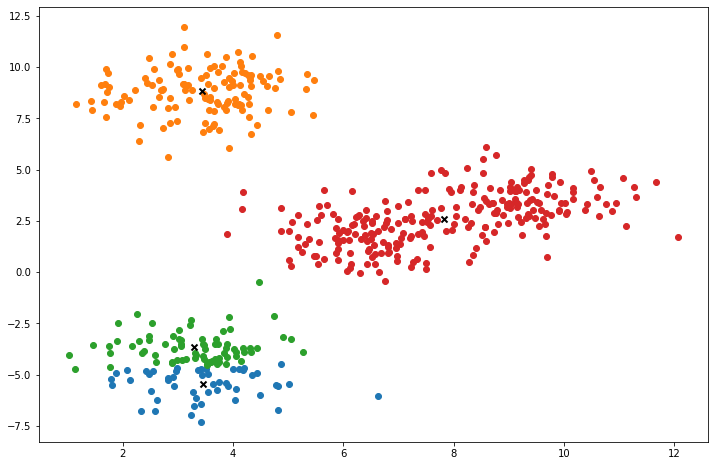

In [7]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers = 4, n_samples = 500, n_features = 2, shuffle = True)
print(X.shape)

clusters = len(np.unique(y))
print(clusters)
k = KMeans(K = clusters, max_iters= 150, plot_steps= False)
y_pred = k.predict(X)

k.plot()

The articially clustered data illustrates how efficiently this algorithm clusters data.

Citations: 

*Python Engineer, MLfromscratch, (2020), Github Repository*